In [50]:
import numpy as np #importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,scale
import seaborn as sns
lbe=LabelEncoder()

In [51]:
data=pd.read_csv(r"C:\Users\Neha\Downloads\train.csv")#Dataset loaded
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
data=data.iloc[:,1:]
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
col=['Name','Ticket','Cabin']
data.drop(columns=col,inplace=True,axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [54]:
data.Sex=lbe.fit_transform(data.Sex)#male=1, female=0
data.loc[data['Embarked']=='S','Embarked']=0
data.loc[data['Embarked']=='C','Embarked']=1
data.loc[data['Embarked']=='Q','Embarked']=2
from collections import Counter
data['Age']=data['Age'].fillna(29)
print(Counter(data['Embarked']))
data['Embarked']=data['Embarked'].fillna(0)
print(Counter(data['Embarked']))


Counter({0: 644, 1: 168, 2: 77, nan: 2})
Counter({0: 646, 1: 168, 2: 77})


In [55]:
y=data.iloc[:,:1]
x=data.iloc[:,1:]
x_train=x.iloc[:500,:]
x_test=x.iloc[500:,:]
y_train=y.iloc[:500,:]
y_test=y.iloc[500:,:]

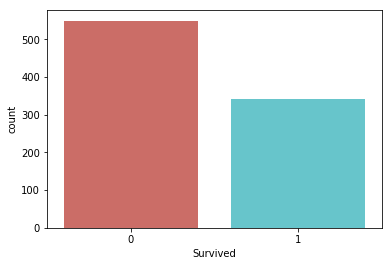

In [56]:
sns.countplot(x='Survived',data=data,palette='hls')
plt.show()

In [57]:
survivors=len(data[data['Survived']==1])
jack=len(data[data['Survived']==0])
survival_rate=(survivors/(survivors+jack))*100
survival_rate

38.38383838383838

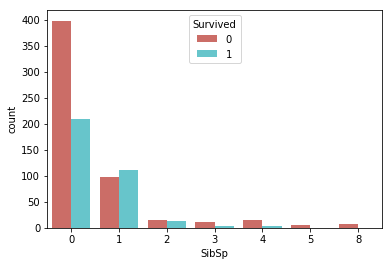

In [58]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
#log.fit(x_train,y_train)
sns.countplot(x='SibSp',hue='Survived',data=data,palette='hls')
plt.show()

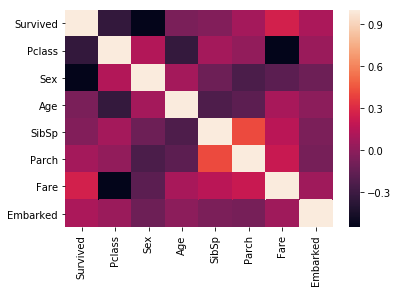

In [59]:
sns.heatmap(data.corr())
plt.show()

In [72]:
logreg=LogisticRegression()
learner=logreg.fit(x_train,y_train)
y_pred=learner.predict(x_test)
per=format(logreg.score(x_test, y_test))
per

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'0.7877237851662404'

714
